In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rc('font',family='Arial')
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300

In [34]:
pixDistance = 1733
length = 490
mmPerPix = 490/1733

In [35]:
datan1 = pd.read_csv('data_03_1xypts.csv', delimiter=",", index_col=False)
datan2 = pd.read_csv('data_03_2xypts.csv', delimiter=",", index_col=False)
datan3 = pd.read_csv('data_04xypts.csv', delimiter=",", index_col=False)

dataf1 = pd.read_csv('data_10xypts.csv', delimiter=",", index_col=False)
dataf2 = pd.read_csv('data_13xypts.csv', delimiter=",", index_col=False)

# dataimpaf1 = pd.read_csv('impaf/output1.csv', header=None)
# dataimpaf2 = pd.read_csv('impaf/output4.csv', header=None)
# dataimpaf3 = pd.read_csv('impaf/output3.csv', header=None)

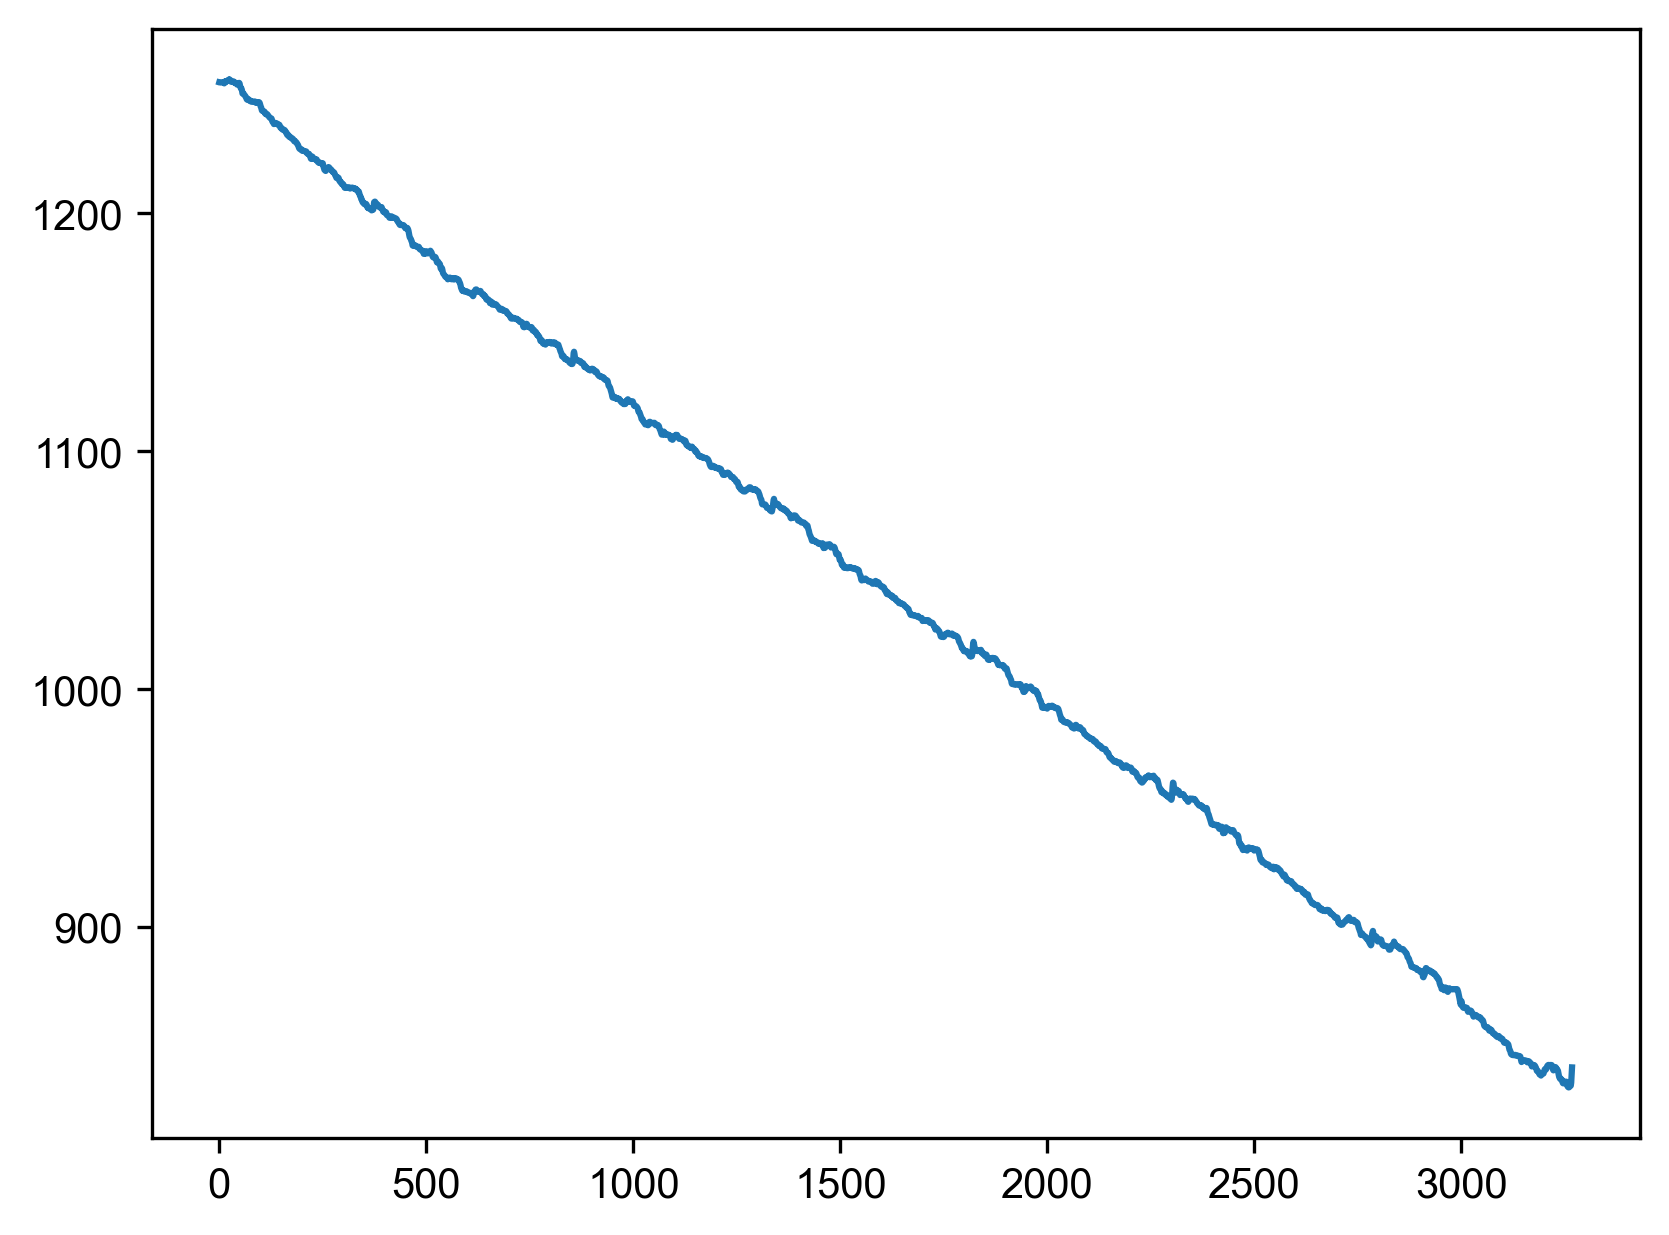

In [36]:
plt.plot(dataf1['pt1_cam1_X'])

In [37]:
nDataSliceX1 = (np.array(datan1['pt1_cam1_X'][:960].to_list()))*mmPerPix
nDataSliceX2 = (np.array(datan2['pt1_cam1_X'][:960].to_list()))*mmPerPix
nDataSliceX3 = (np.array(datan3['pt1_cam1_X'][6800:6800+960*4][::4].to_list()))*mmPerPix

fDataSliceX1 = (np.array(dataf1['pt1_cam1_X'][:0+960].to_list()))*mmPerPix
fDataSliceX2 = (np.array(dataf1['pt1_cam1_X'][960:960*2].to_list()))*mmPerPix
fDataSliceX3 = (np.array(dataf2['pt1_cam1_X'][3000:3000+960*4][::4].to_list()))*mmPerPix

nDataSliceX1 = -(nDataSliceX1 - np.max(nDataSliceX1))
nDataSliceX2 = -(nDataSliceX2 - np.max(nDataSliceX2))
nDataSliceX3 = -(nDataSliceX3 - np.max(nDataSliceX3))

fDataSliceX1 = -(fDataSliceX1 - np.max(fDataSliceX1))*1.1
fDataSliceX2 = -(fDataSliceX2 - np.max(fDataSliceX2))*1.2
fDataSliceX3 = -(fDataSliceX3 - np.max(fDataSliceX3))

nSliceX = [nDataSliceX1, nDataSliceX2, nDataSliceX3]
fSliceX = [fDataSliceX1, fDataSliceX2, fDataSliceX3]

In [38]:
nDataSliceY1 = (-np.array(datan1['pt1_cam1_Y'][210:210+960].to_list()) - 70)*mmPerPix
nDataSliceY2 = (-np.array(datan2['pt1_cam1_Y'][:+960].to_list()) + 5)*mmPerPix
nDataSliceY3 = (-np.array(datan3['pt1_cam1_Y'][6800:6800+960*4][::4].to_list()) - 20)*mmPerPix

nDataSliceY2 = np.array(nDataSliceY2[60:].tolist() + nDataSliceY3[-60:].tolist())

fDataSliceY1 = (-np.array(dataf1['pt1_cam1_Y'][:0+960].to_list()))*mmPerPix
fDataSliceY2 = (-np.array(dataf1['pt1_cam1_Y'][960:960*2].to_list()) + 10)*mmPerPix
fDataSliceY3 = (-np.array(dataf2['pt1_cam1_Y'][3000:3000+960*4][::4].to_list()) + 15)*mmPerPix


nSliceY = [nDataSliceY1, nDataSliceY2, nDataSliceY3]
fSliceY = [fDataSliceY1, fDataSliceY2, fDataSliceY3]
# nDataSliceY1 = -(nDataSliceY1 - np.max(nDataSliceY1))
# nDataSliceY2 = -(nDataSliceY2 - np.max(nDataSliceY2))
# nDataSliceY3 = -(nDataSliceY3 - np.max(nDataSliceY3))

# fDataSliceY1 = -(fDataSliceY1 - np.max(fDataSliceY1))
# fDataSliceY2 = -(fDataSliceY2 - np.max(fDataSliceY2))
# fDataSliceY3 = -(fDataSliceY3 - np.max(fDataSliceY3))

Text(0, 0.5, 'Horizen Distance [mm]')

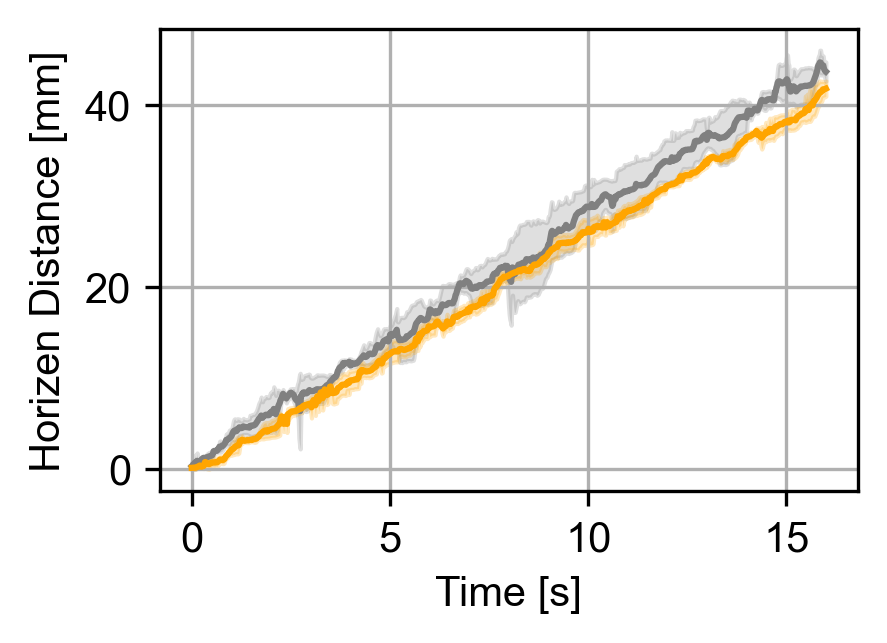

In [39]:
upLineF = []
midLineF = []
downLineF = []
upLineN = []
midLineN = []
downLineN = []

for i in range(len(nDataSliceY1)):
    tmpFData = [item[i] for item in fSliceX]
    tmpNData = [item[i] for item in nSliceX]
    midLineF.append(np.mean(tmpFData))
    upLineF.append(np.mean(tmpFData) + np.std(tmpFData))
    downLineF.append(np.mean(tmpFData) - np.std(tmpFData))
    midLineN.append(np.mean(tmpNData))
    upLineN.append(np.mean(tmpNData) + np.std(tmpNData))
    downLineN.append(np.mean(tmpNData) - np.std(tmpNData))
t = np.linspace(0,16,len(nDataSliceY1))
plt.figure(figsize=(3, 2))
plt.fill_between(t, upLineN, downLineN, color='gray', alpha=0.25)
plt.fill_between(t, upLineF, downLineF, color='orange', alpha=0.25)
# plt.fill_between(t, upLineImpaf, downLineImpaf, color='blue', alpha=0.25)
plt.plot(t,midLineN, color='gray')
plt.plot(t,midLineF, color='orange')
# plt.plot(t,midLineImpaf, color='blue')
plt.grid()
# plt.ylim([-10,10])
plt.xlabel("Time [s]")
plt.ylabel("Horizen Distance [mm]")

Text(0, 0.5, 'Vertical Distance [mm]')

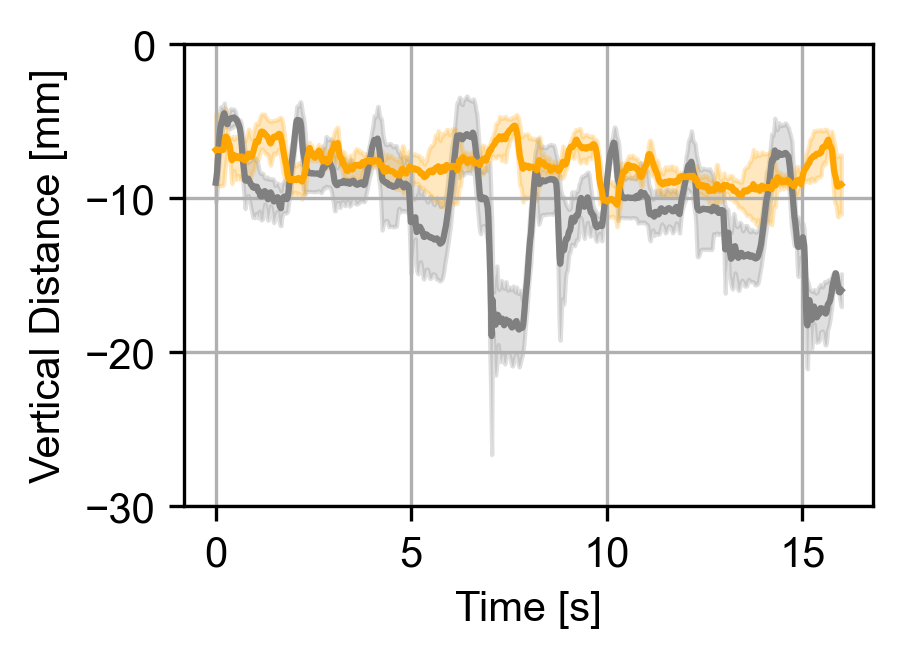

In [45]:
upLineF = []
midLineF = []
downLineF = []
upLineN = []
midLineN = []
downLineN = []

for i in range(len(nDataSliceY1)):
    tmpFData = [item[i]+170 for item in fSliceY]
    tmpNData = [item[i]+170 for item in nSliceY]
    midLineF.append(np.mean(tmpFData))
    upLineF.append(np.mean(tmpFData) + np.std(tmpFData))
    downLineF.append(np.mean(tmpFData) - np.std(tmpFData))
    midLineN.append(np.mean(tmpNData))
    upLineN.append(np.mean(tmpNData) + np.std(tmpNData))
    downLineN.append(np.mean(tmpNData) - np.std(tmpNData))
t = np.linspace(0,16,len(nDataSliceY1))
plt.figure(figsize=(2.96, 2))
plt.fill_between(t, upLineN, downLineN, color='gray', alpha=0.25)
plt.fill_between(t, upLineF, downLineF, color='orange', alpha=0.25)
# plt.fill_between(t, upLineImpaf, downLineImpaf, color='blue', alpha=0.25)
plt.plot(t,midLineN, color='gray')
plt.plot(t,midLineF, color='orange')
# plt.plot(t,midLineImpaf, color='blue')
plt.grid()
plt.ylim([-30,0])
plt.xlabel("Time [s]")
plt.ylabel("Vertical Distance [mm]")

ValueError: x and y must have same first dimension, but have shapes (3840,) and (960,)

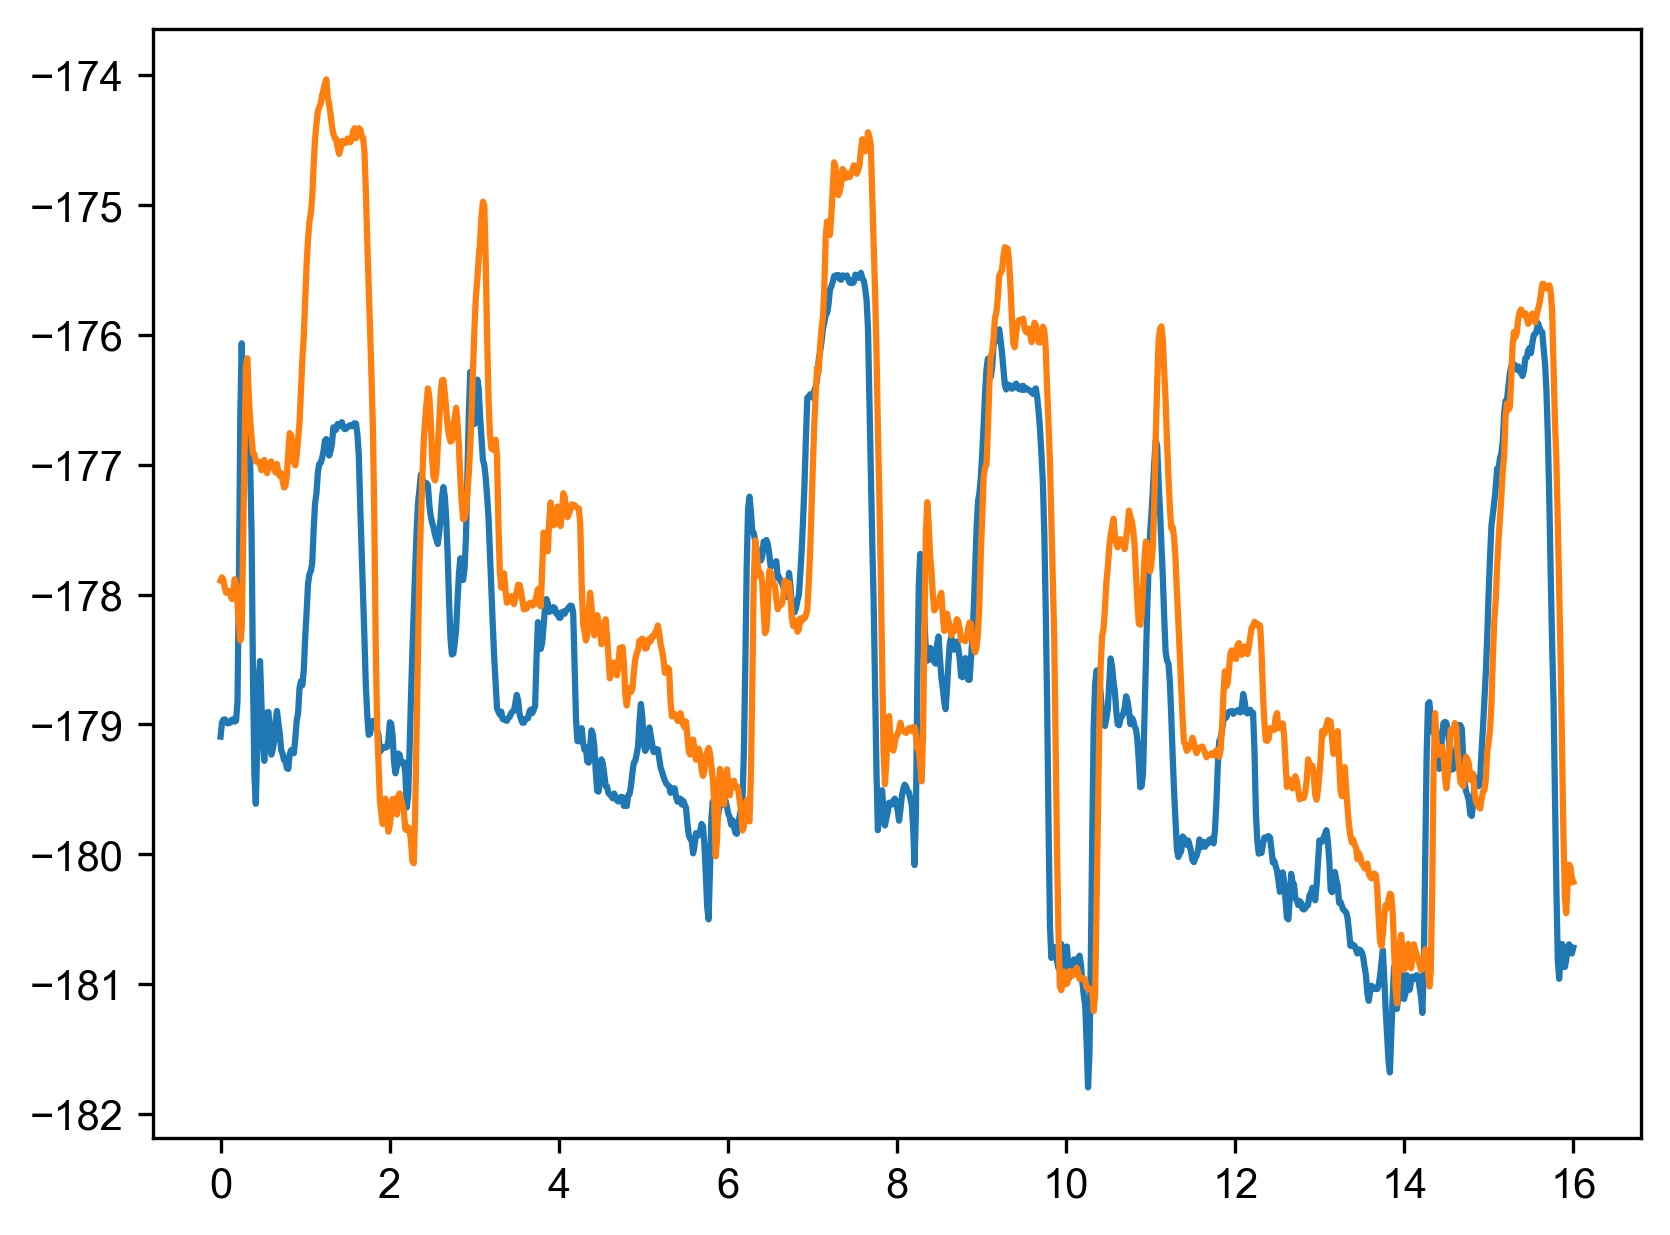

In [41]:
t60 = np.linspace(0, 960/60, 960)
t240 = np.linspace(0, 960/60, 960*4)
plt.plot(t60, fDataSliceY1)
plt.plot(t60, fDataSliceY2)
plt.plot(t240, fDataSliceY3)

plt.plot(t60, nDataSliceY1)
plt.plot(t60, nDataSliceY2)
plt.plot(t240, nDataSliceY3)

plt.legend([1,2,3,4,5,6])